In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
import os

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them manually

In [6]:
# You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips:
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion

def get_data(filename):
    with open(filename) as current_file:
        csv_reader=csv.reader(current_file,delimiter=',')
        first_line=True
        temp_images=[]
        temp_labels=[]
        for row in csv_reader:
            if first_line:
                first_line=False
            else:
                temp_labels.append(row[0])
                image_data=row[1:785]
                image_data_as_array=np.array_split(image_data,28)
                temp_images.append(image_data_as_array)
        images=np.array(temp_images).astype('float')
        labels=np.array(temp_labels).astype('float')
    return images,labels

path_sign_mnist_train = "/content/drive/My Drive/colab/sign/sign_mnist_train.csv"
path_sign_mnist_test = "/content/drive/My Drive/colab/sign/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [7]:
"""
"expand_dims" will not add or reduce elements in a tensor, it just changes the shape by
adding 1 to dimensions. For example, a vector with 10 elements could be treated as a 10x1 matrix.

The situation I have met to use expand_dims is when I tried to build a ConvNet
to classify grayscale images. The grayscale images will be loaded as matrix of size [320, 320].
However, tf.nn.conv2d require input to be [batch, in_height, in_width, in_channels],
where the in_channels dimension is missing in my data which in this case should be 1.
So I used expand_dims to add one more dimension.
"""
training_images = np.expand_dims(training_images, axis=3) # means add an axis at 3rd position atarting from 0
testing_images = np.expand_dims(testing_images, axis=3)
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [8]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1. / 255)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

# Compile Model.
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=2,
                              validation_data=validation_datagen.
                              flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

# Your Code Here (set 'epochs' = 2))

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/2
857/857 [==============================] - 22s 12ms/step - loss: 3.0585 - accuracy: 0.0871 - val_loss: 1.9564 - val_accuracy: 0.3558
Epoch 2/2
857/857 [==============================] - 10s 12ms/step - loss: 2.2599 - accuracy: 0.2846 - val_loss: 1.7574 - val_accuracy: 0.3957


[181.85580444335938, 0.34955382347106934]

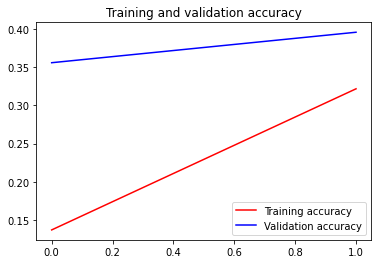

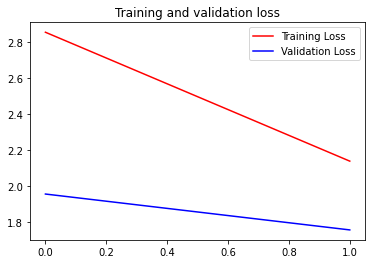

In [10]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
"""
acc = # Your Code Here
val_acc = # Your Code Here
loss = # Your Code Here
val_loss = # Your Code Here
"""
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()